# Visualizing Amplitude-Based QLBM circuits

In [1]:
# Import the required packages from the qlbm framework
from qlbm.components import (
    CQLBM,
    ABStreamingOperator,
    ControlledIncrementer,
    MSStreamingOperator,
    SpeedSensitivePhaseShift,
)
from qlbm.components.ab import ABStreamingOperator
from qlbm.lattice import ABLattice, MSLattice

In [2]:
example_lattice_ms = MSLattice(
    {
        "lattice": {"dim": {"x": 32, "y": 8}, "velocities": {"x": 4, "y": 4}},
        "geometry": [
            {"shape": "cuboid", "x": [4, 7], "y": [1, 5], "boundary": "bounceback"}
        ],
    }
)

example_lattice_ab = ABLattice(
    {
        "lattice": {"dim": {"x": 128, "y": 8}, "velocities": "d2q9"},
        "geometry": [
            {"shape": "cuboid", "x": [4, 7], "y": [1, 5], "boundary": "bounceback"}
        ],
    }
)


In [3]:
# Define an example which uses 4 velocity qubits and the qubits with speed 2 will stream
speed_shift_primitive = SpeedSensitivePhaseShift(5, 1, True)

In [4]:
# You can draw circuits in Qiskit's ASCII art format
speed_shift_primitive.draw("text")

┌─────────┐
q_0: ┤ P(π/16) ├
     └┬────────┤
q_1: ─┤ P(π/8) ├
      ├────────┤
q_2: ─┤ P(π/4) ├
      ├────────┤
q_3: ─┤ P(π/2) ├
      └┬──────┬┘
q_4: ──┤ P(π) ├─
       └──────┘

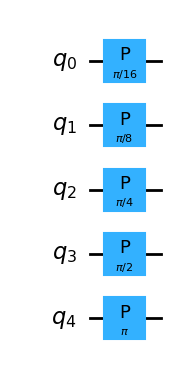

In [5]:
# Also through Qiskit's Matplotlib interface
speed_shift_primitive.draw("mpl")

In [6]:
# Can also export directly to Latex source
speed_shift_primitive.draw("latex_source")

'\\documentclass[border=2px]{standalone}\n\n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{graphicx}\n\n\\begin{document}\n\\scalebox{1.0}{\n\\Qcircuit @C=1.0em @R=0.2em @!R { \\\\\n\t \t\\nghost{{q}_{0} :  } & \\lstick{{q}_{0} :  } & \\gate{\\mathrm{P}\\,(\\mathrm{\\frac{\\pi}{16}})} & \\qw & \\qw\\\\\n\t \t\\nghost{{q}_{1} :  } & \\lstick{{q}_{1} :  } & \\gate{\\mathrm{P}\\,(\\mathrm{\\frac{\\pi}{8}})} & \\qw & \\qw\\\\\n\t \t\\nghost{{q}_{2} :  } & \\lstick{{q}_{2} :  } & \\gate{\\mathrm{P}\\,(\\mathrm{\\frac{\\pi}{4}})} & \\qw & \\qw\\\\\n\t \t\\nghost{{q}_{3} :  } & \\lstick{{q}_{3} :  } & \\gate{\\mathrm{P}\\,(\\mathrm{\\frac{\\pi}{2}})} & \\qw & \\qw\\\\\n\t \t\\nghost{{q}_{4} :  } & \\lstick{{q}_{4} :  } & \\gate{\\mathrm{P}\\,(\\mathrm{\\pi})} & \\qw & \\qw\\\\\n\\\\ }}\n\\end{document}'

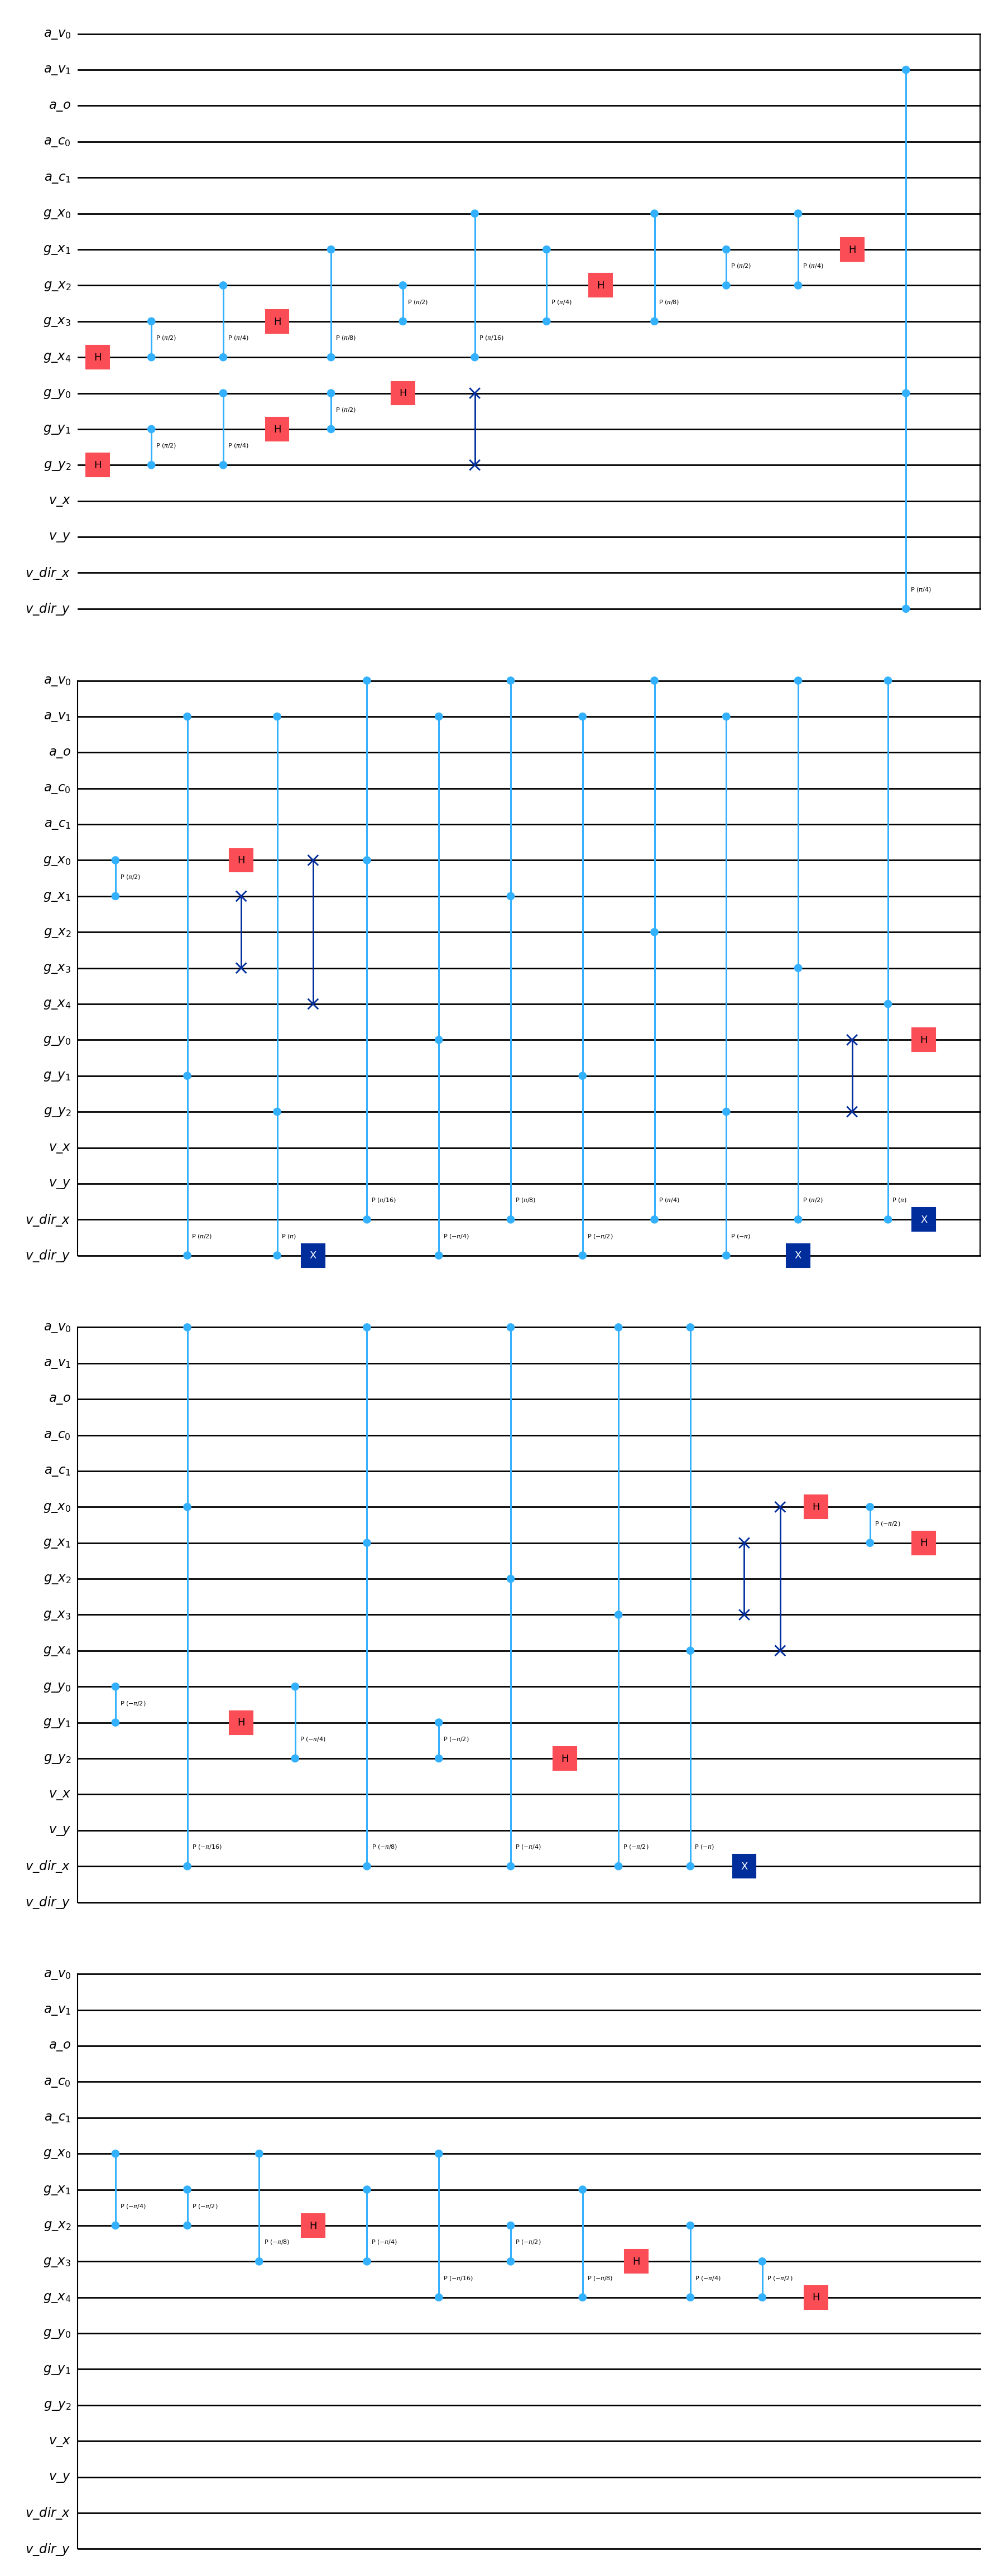

In [7]:
# All primitives can be drawn to the same interface
ControlledIncrementer(example_lattice_ms, reflection=False).draw("mpl")

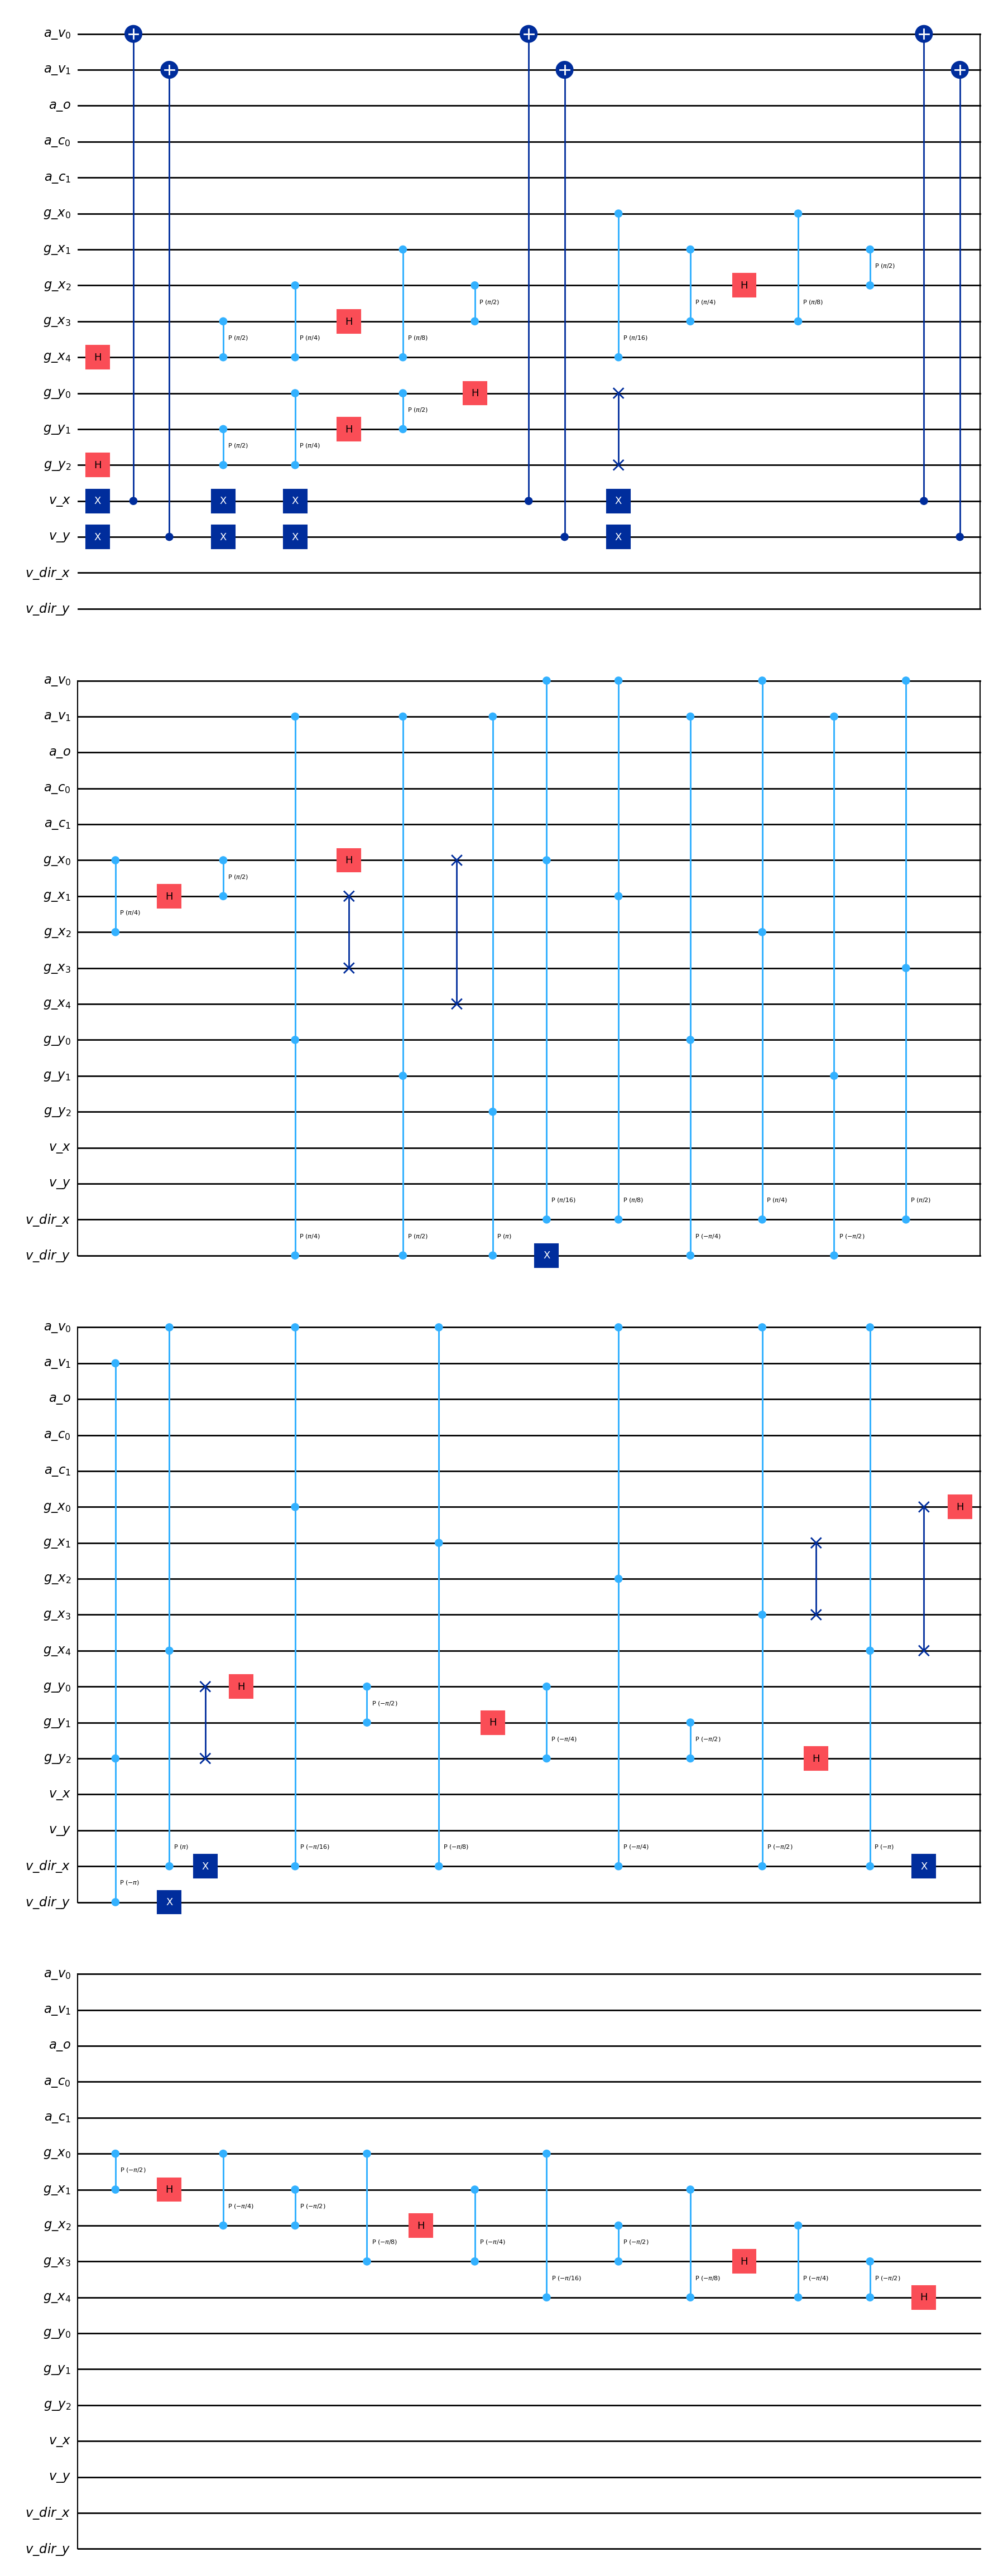

In [8]:
# All operators can be drawn the same way
MSStreamingOperator(
    example_lattice_ms,
    [0, 2, 3],
).draw("mpl")

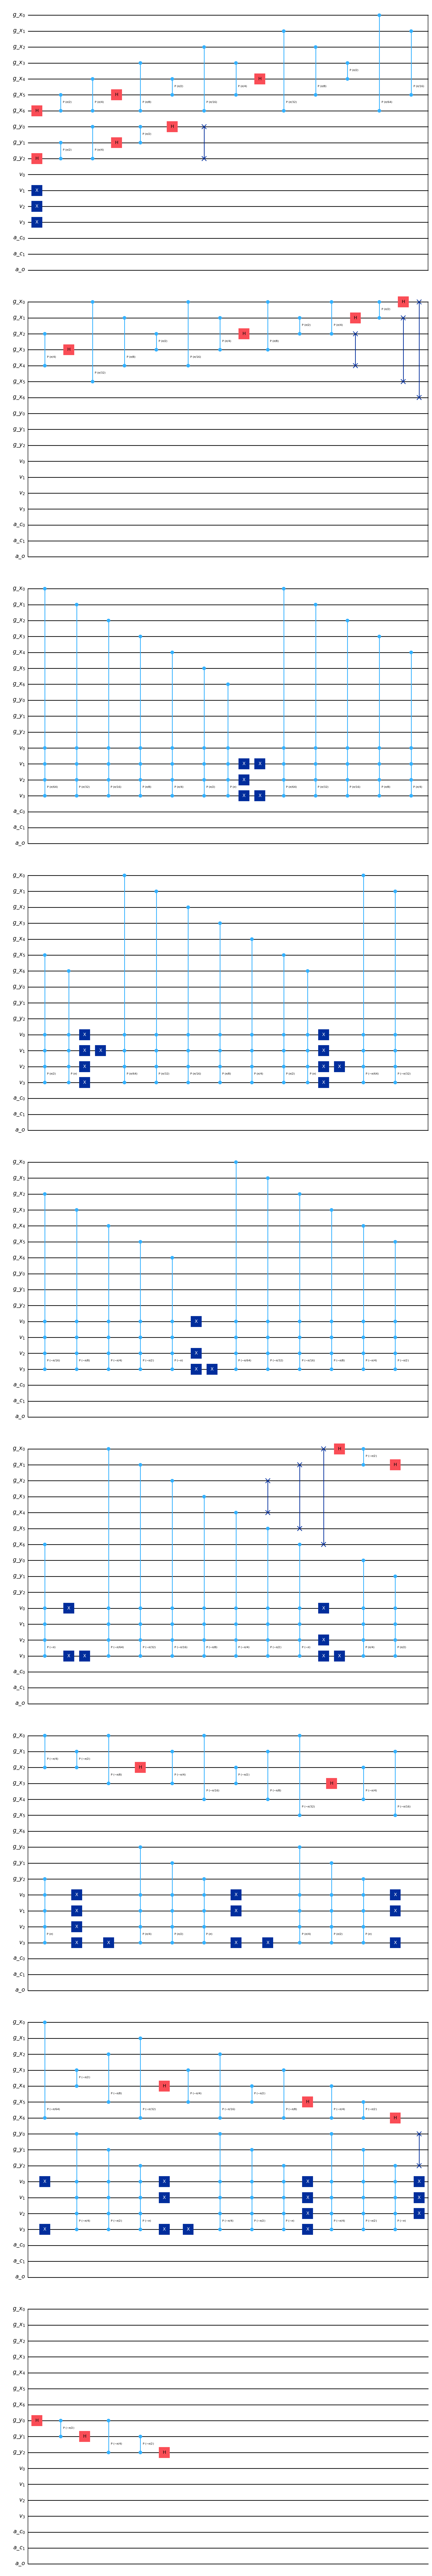

In [9]:
# This works for all quantum components in the library
ABStreamingOperator(example_lattice_ab).draw("mpl")